In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, KFold

In [2]:
df = pd.read_pickle("data/df_final.pickle")
df

,address,rent($),rooms,beds,baths,studio,days on market,Balcony,Bike Room,Cats and Dogs Allowed,...,Smoke-free,Storage Available,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
0,3900 Kings Highway,2075,3.0,2.0,1.0,0,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,161 Engert Avenue,2600,4.0,2.0,1.0,0,2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1326 Ocean Avenue,2300,3.0,2.0,1.0,0,12,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,223 9th Street,2395,5.0,2.0,2.0,0,3,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,623 Park Place,4000,6.0,4.0,1.5,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,224 Eckford Street,4800,6.0,4.0,2.0,0,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2754,222 Stanhope Street,2625,6.0,4.0,1.0,0,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2755,178 Ocean Parkway,1575,3.0,0.0,1.0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2756,345 Eldert Street,2720,2.0,1.0,1.0,0,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model 1: Simple Linear Regression with Few Features

In [10]:
simple_df = df.iloc[:, 1:6]
print(simple_df.shape)
simple_df.head()

(2758, 5)


,rent($),rooms,beds,baths,studio
0,2075,3.0,2.0,1.0,0
1,2600,4.0,2.0,1.0,0
2,2300,3.0,2.0,1.0,0
3,2395,5.0,2.0,2.0,0
4,4000,6.0,4.0,1.5,0


,rent($),rooms,beds,baths,studio
rent($),1.000000,0.379884,0.427419,0.437348,-0.181400
rooms,0.379884,1.000000,0.800306,0.458669,-0.454122
beds,0.427419,0.800306,1.000000,0.429805,-0.525714
baths,0.437348,0.458669,0.429805,1.000000,-0.134067
studio,-0.181400,-0.454122,-0.525714,-0.134067,1.000000


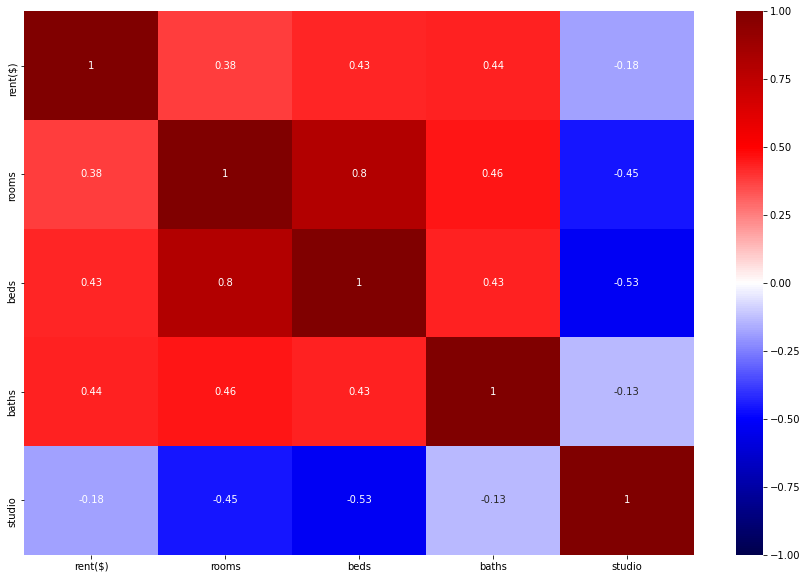

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(simple_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

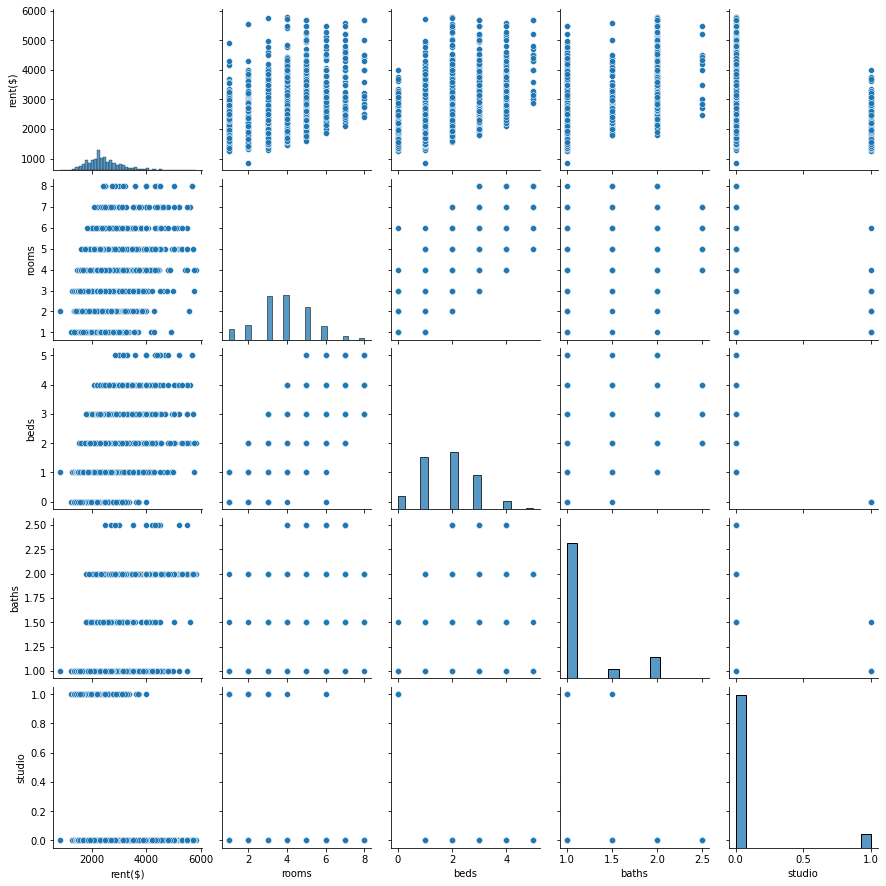

In [20]:
sns.pairplot(simple_df)

In [22]:
# Splitting into train, validate, and test sets

features, target = simple_df.iloc[:, 1:], simple_df[["rent($)"]]

X, X_test, y, y_test = train_test_split(features, target, test_size = 0.2, shuffle = True, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state=42)

print(len(X_train))
print(len(X_val))
print(len(X_test))

1654
552
552


In [27]:
# 5 split Kfold test on training data

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=kfold)
print(scores)
print("Mean score: ", np.mean(scores))

[0.28465979 0.1833678  0.30504643 0.22958702 0.23047237]
Mean score:  0.24662668197976534


Not very high, and significant variance between the scores. Let's see a visual representation of the model, though.

In [62]:
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

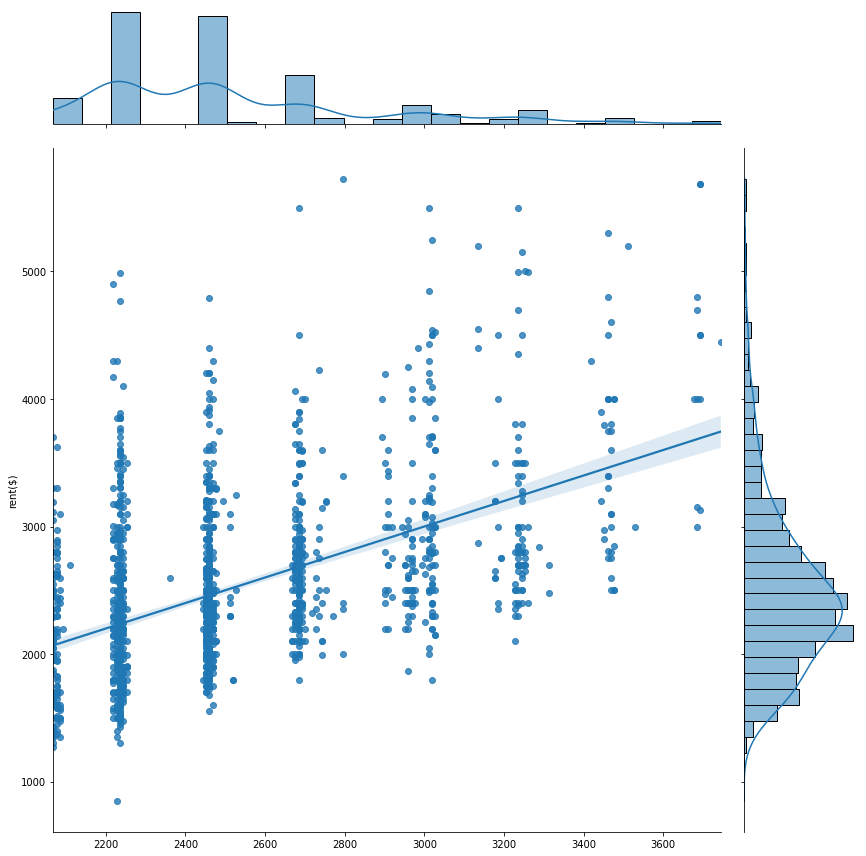

In [65]:
sns.jointplot(x = y_train_pred.flatten(), y = y_train.squeeze(), kind = "reg", height = 12)

In [86]:
print(lr.intercept_)
print(list(features.columns))
print(lr.coef_)

[1442.97935049]
['rooms', 'beds', 'baths', 'studio']
[[  8.36907003 216.23640338 551.14580533  65.95753077]]
